1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [2]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.7 KB


In [5]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


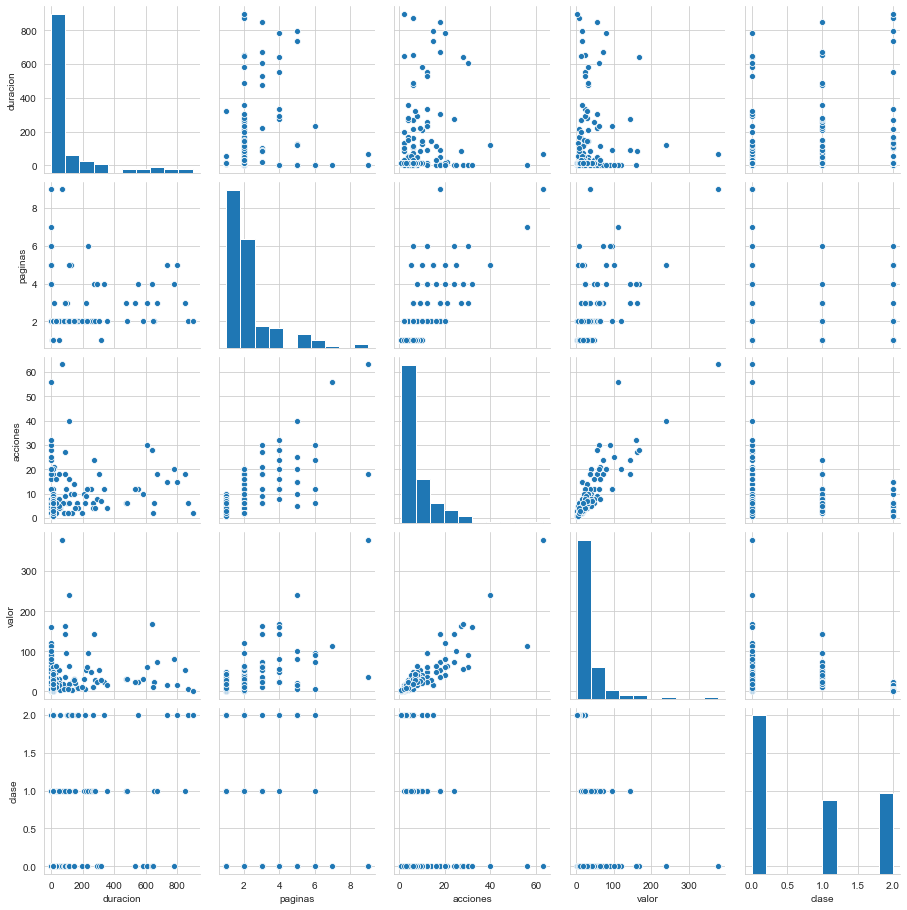

In [6]:
sns.pairplot(dataframe)

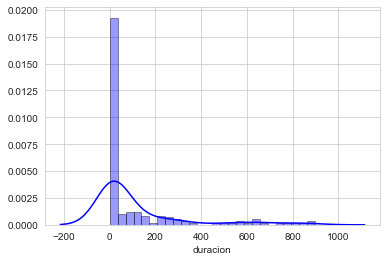

In [7]:
#Distribucion de duracion
sns.distplot(dataframe['duracion'], hist_kws=dict(edgecolor="black", linewidth=1), color='Blue')

In [10]:
#muestro la correlacion con otras columnas y parece que es con páginas pero es baja al ser inferior a 0.5
dataframe.corr()

,duracion,paginas,acciones,valor,clase
duracion,1.000000,0.277550,0.163028,0.090869,0.128706
paginas,0.277550,1.000000,0.724061,0.583910,-0.052813
acciones,0.163028,0.724061,1.000000,0.862961,-0.329954
valor,0.090869,0.583910,0.862961,1.000000,-0.322737
clase,0.128706,-0.052813,-0.329954,-0.322737,1.000000


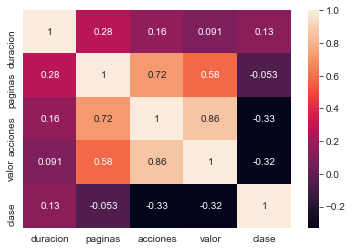

In [15]:
# usamos heatmap para mostrar correlacion
sns.heatmap(dataframe.corr(), annot = True)

In [16]:
dataframe.columns

Index(['duracion', 'paginas', 'acciones', 'valor', 'clase'], dtype='object')

In [19]:
# Mis variables
X = dataframe[['paginas', 'acciones', 'valor', 'clase']]

In [20]:
# Mi target
y = dataframe['duracion']

In [25]:
# partimos el conjunto de datos y un 40% lo marco para el conjunto de test. Pongo semilla para que lo desordene siempre igual cuando ejecute
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [26]:
#Libreria para crear nuestro modelo (caja negra)
from sklearn.linear_model import LinearRegression

In [27]:
#ponemos todos los procesadores a trabajar
model = LinearRegression(n_jobs=-1)

In [28]:
#Entreno mi modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [29]:
#Calculo el hiperplano que cortará eje y
print(model.intercept_)

27.509948397458373


In [31]:
# Calculo las pendientes de cada una de las variables que en este caso son 4
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
paginas,54.518710
acciones,-5.920125
valor,0.274621
clase,22.924541


In [32]:
#predicciones de nuestro modelo con el conjunto de test
predictions = model.predict(X_test)

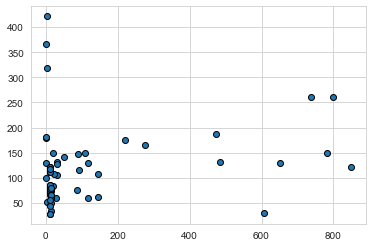

In [35]:
# comparo las predicciones con los valores de y_text 
plt.scatter(y_test, predictions, edgecolor='black')

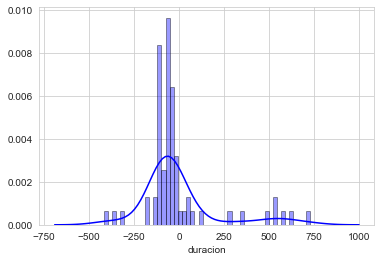

In [34]:
# restamos los datos de nuestra predicción con los datos reales que tenemos de y_test, vemos si se asemaja a la primera distribución que he sacado.
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [36]:
from sklearn import metrics

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 136.74251499632211
MSE: 44654.79365934557
RMSE: 211.3168087477794


In [40]:
model.score(X,y)

0.07189115952848646

In [ ]:
#La duración tiene una correlacción muy baja con el resto de las variables.
#MSE y RMSE  son valores altos